<IPython.core.display.Javascript object>


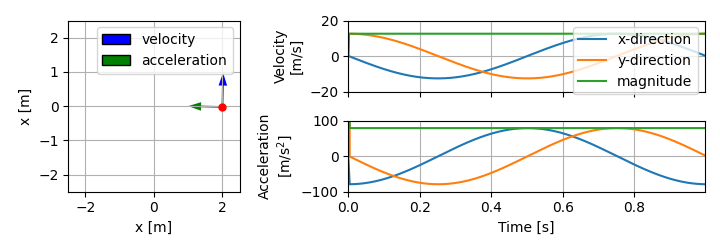

In [8]:
%matplotlib notebook

# import modules
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# declare constants
dt = 0.002  # sample time
pm = 2  # [m], amplitude of circular movement

t = np.arange(0, 1, dt)  # time base
N = len(t)  # number of samples

Px = pm * np.cos(2*np.pi*t)  # x-coordinate of point P
Py = pm * np.sin(2*np.pi*t)  # y-coordinate of point P

# declaration of memory for velocity v
vx = np.zeros(N)  
vy = np.zeros(N)
v = np.zeros(N)

# declaration of memory for acceleration a
ax = np.zeros(N)
ay = np.zeros(N)
a = np.zeros(N)

# create plot
fig = plt.figure(figsize=(7.2, 2.5))  # create figure
gs = fig.add_gridspec(2, 2, width_ratios=[1, 2])  # create 2x2 grid for axes

ax1 = fig.add_subplot(gs[:, 0])  # add plot for point P
ax2 = fig.add_subplot(gs[0, 1])  # add plot for velocity
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2)  # add plot for acceleration, sharing the x-axis with velocity
plt.setp(ax2.get_xticklabels(), visible=False)  # remove numbers from x-axis of velocity

# create initial plots without any data
hPv = ax1.arrow(0, 0, 1, 1, label='velocity',
                width=.05, length_includes_head=True, head_width=.25, ls='', fc='b')
hPa = ax1.arrow(0, 0, 1, 1, label='acceleration',
                width=.05, length_includes_head=True, head_width=.25, ls='', fc='g')
hP = ax1.plot([], [], 'r.', markersize=10)  # point

hvx = ax2.plot([], [], label='x-direction')  # x-component of velocity
hvy = ax2.plot([], [], label='y-direction')  # y-component of velocity
hv = ax2.plot([], [], label='magnitude')  # magnitude of velocity

hax = ax3.plot([], [], label='x-direction')  # x-component of acceleration  
hay = ax3.plot([], [], label='y-direction')  # y-component of acceleration
ha = ax3.plot([], [], label='magnitude')  # magnitude of acceleration


ax1.set_xlim(np.array([-1, 1])*1.25*PM)
ax1.set_ylim(np.array([-1, 1])*1.25*PM)
ax1.set_aspect(1)
ax1.grid()
ax1.set_xlabel('x [m]')
ax1.set_ylabel('x [m]')
ax1.legend(loc=1)

ax2.grid(True)
ax3.grid(True)

# layout of the grid
def init():
    pass
    
ax2.set_xlim([0, t[-1]])
ax2.set_ylim([-20, 20])
ax2.set_ylabel('Velocity\n[m/s]')
ax2.legend(loc=1)

ax3.set_xlim([0, t[-1]])
ax3.set_ylim([-100, 100])
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Acceleration\n[m/s$^2$]')


# step through each data point
def update(n):
    
    # calculation of vx, vy and magnitude of v
    vx[n] = (Px[n] - Px[n-1])/dt
    vy[n] = (Py[n] - Py[n-1])/dt
    v[n] = np.sqrt(vx[n]**2 + vy[n]**2)
    
    # calculation of ax, ay and magnitude of a
    ax[n] = (vx[n] - vx[n-1])/dt
    ay[n] = (vy[n] - vy[n-1])/dt
    a[n] = np.sqrt(ax[n]**2 + ay[n]**2)
    
    # set new data for each plot
    hP[0].set_data(Px[n], Py[n])  # only plot the current frame
#     hPv[0].set_data([Px[n], Px[n]+vx[n]/v[n]], [Py[n], Py[n]+vy[n]/v[n]])
#     hPa[0].set_data([Px[n], Px[n]+ax[n]/a[n]], [Py[n], Py[n]+ay[n]/a[n]])
    hPv.set_data(x=Px[n], y=Py[n], dx=vx[n]/v[n], dy=vy[n]/v[n])
    hPa.set_data(x=Px[n], y=Py[n], dx=ax[n]/a[n], dy=ay[n]/a[n])
    
    hvx[0].set_data(t[:n], vx[:n])  # plots data _up to_ this frame
    hvy[0].set_data(t[:n], vy[:n])
    hv[0].set_data(t[:n], v[:n])
    
    hax[0].set_data(t[:n], ax[:n])
    hay[0].set_data(t[:n], ay[:n])
    ha[0].set_data(t[:n], a[:n])
    

fig.tight_layout()  # bring layout of figure together

# animate the plot
anim = animation.FuncAnimation(#
    fig,  # figure to animate
    update,  # function to call each frame
    frames=range(1, N),  # which frames to run, skip frame 0 because velocity at frame 0 can't be calculated
    interval=dt*1000,  # duration of each frame in [ms]
    init_func=init,  # initial layout function
    blit=True,
    repeat=False)

<IPython.core.display.Javascript object>


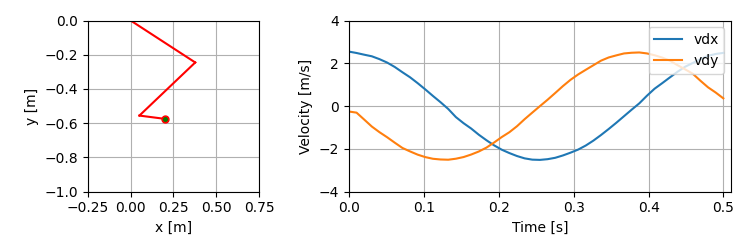

In [7]:
%matplotlib notebook

import numpy as np
from scipy import io as spio
from matplotlib import pyplot as plt
from matplotlib import animation

# load data from *.mat file
data = spio.loadmat('cyclemotion.mat')

# extract variables from data
th1 = np.squeeze(data['th1'])  # angle theta1 [rad]
th2 = np.squeeze(data['th2'])  # angle theta2 [rad]
th3 = np.squeeze(data['th3'])  # angle theta3 [rad]
dx_val = np.squeeze(data['dx_val'])  # validation data x [m]
dy_val = np.squeeze(data['dy_val'])  # validation data y [m]

# extract constants from data
dt = np.squeeze(data['dt'])  # time step [s]
lup = np.squeeze(data['lup'])  # length of upper leg [m]
llo = np.squeeze(data['llo'])  # length of lower leg [m]
lft = np.squeeze(data['lft'])  # length of foot [m]

N = len(th1)  # determine number of time points
t = np.linspace(0, N*dt, N)  # time axis

# create figure and subplot grid
fig = plt.figure(figsize=(7.5, 2.5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])
ax1 = fig.add_subplot(gs[0])  # first subplot axis
ax2 = fig.add_subplot(gs[1])  # second subplot axis

ax1.set_xlim(-.25, .75)
ax1.set_ylim(-1, 0)
ax1.set_aspect(1)
ax1.grid(True)
ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')

ax2.set_xlim(0, t[-1])
ax2.set_ylim(-4, 4)
ax2.grid(True)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Velocity [m/s]')

# pre-plots without data
hAB = ax1.plot([], [], 'r')  # line segment AB
hBC = ax1.plot([], [], 'r')  # line segment BC
hCD = ax1.plot([], [], 'r')  # line segment CD
hD = ax1.plot([], [], 'r.', markersize=10)  # point D
hD_val = ax1.plot([], [], 'g.', markersize=5)  # validation point D

hvdx = ax2.plot([], [], label='vdx')  # velocity of point D in the x-direction
hvdy = ax2.plot([], [], label='vdy')  # velocity of point D in the y-direction

ax2.legend(loc=1)  # add legend to axis 2

## Exercise 1a, b: Calculate segment positions and orientation (i.e. begin- and 
# endpoints) and plot in animation.
# Declaration of the variables to be calculated, i.e. x-y coordinates in the global 
# frame of point B, C and D. Reminder that point A (hip joint) is in the original of 
# the global frame.
# Fill in:
bx = np.sin(th1) * lup
by = - np.cos(th1) * lup
cx = bx + np.sin(th2) * llo
cy = by - np.cos(th2) * llo
dx = cx + np.sin(th3) * lft
dy = cy - np.cos(th3) * lft
## After you have filled in the calculations for each exercise you can plot
# the corresponding results by uncommenting and filling in at the appropriate lines
# in the update function further down.


## Exercise 2: Calculate the velocity in x- and y-directions at point D.
# Calculate x-y velocities of point B.
w1 = np.gradient(th1, dt)  # angular velocity w1 as the gradient (slope/derivative) of th1
# Fill in:
vbx = lup * w1 * np.cos(th1)
vby = lup * w1 * np.sin(th1)

# Calculate x-y velocities of point C relative to point B.
# Fill in:
w2 = np.gradient(th2, dt)
vcbx = llo * w2 * np.cos(th2)
vcby = llo * w2 * np.sin(th2)

# Calculate x-y velocities of point C relative to the global frame.
# Fill in:
vcx = vbx + vcbx
vcy = vby + vcby

# Calculate x-y velocities of point D relative to point C.
# Fill in:
w3 = np.gradient(th3, dt)
vdcx = lft * w3 * np.cos(th3)
vdcy = lft * w3 * np.sin(th3)

# Calculate x-y velocities of point D relative to the global frame.
# Fill in:
vdx = vcx + vdcx
vdy = vcy + vdcy
## After you have filled in the calculations for each exercise you can plot the 
# velocities by uncommenting the last lines in the update function.

def update(n):
    ## Exercise 1a: Plot positions and segments
    # Uncomment when the x-y coordinates are calculated:
    hAB[0].set_data([0, bx[n]], [0, by[n]])
    hBC[0].set_data([bx[n], cx[n]], [by[n], cy[n]])
    hCD[0].set_data([cx[n], dx[n]], [cy[n], dy[n]])
    hD[0].set_data(dx[n], dy[n])
    
    ## Exercise 1b: Plot the recorded point D (x-y coordinates) for validation
    # of your animation. Endpoints should coincide.
    # Uncomment and fill in:
    hD_val[0].set_data([dx_val[n], dy_val[n]])
    
    ## Exercise 2: Plot x-y velocities of point D using summation of segments.
    # Uncomment when vdx and vdy have been calculated:
    hvdx[0].set_data(t[:n], vdx[:n])
    hvdy[0].set_data(t[:n], vdy[:n])

anim = animation.FuncAnimation(#
    fig,  # figure to animate
    update,  # function to call each frame
    frames=N,  # number of frames to be run
    interval=dt*1000,  # duration of each frame in [ms]
    repeat=False)

fig.tight_layout()  # Makes subplots fit better